### Testing custom package

In [1]:
from nav_pii_anon.spacy.spacy_model import SpacyModel
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
tx = ("Mitt navn er Marius og mitt personnummer er 15044216652Marius. "
      "Telefonnummeret mitt er 94867658 og jeg reiser "
      "hjem 24.07.2020")

In [9]:
print(tx)

Mitt navn er Marius og mitt personnummer er 15044216652Marius. Telefonnummeret mitt er 94867658 og jeg reiser hjem 24.07.2020


In [ ]:
nlp = SpacyModel()

In [ ]:
nlp.add_patterns(before_ner = False)

In [ ]:
nlp.predict(tx)

In [6]:
nlp.replace(tx, "pad")

'Mitt navn er ~~~~~~ og mitt personnummer er ~~~~~~~~~~~~ Telefonnummeret mitt er ~~~~~~~~ og jeg reiser hjem ~~~~~~~~~~'

In [7]:
nlp.similarity(tx, "pad")

0.9964297761969523

In [8]:
nlp.similarity(tx)

0.35808397630639394

In [9]:
nlp.similarity(tx, "shuffle")

0.512818933254239

In [10]:
nlp.similarity(tx, "character")

0.8483921971402074

In [6]:
graph = nlp.dependency_graph(tx)

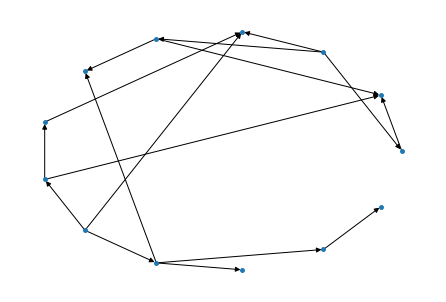

In [7]:
nx.draw_shell(graph, node_size=15)

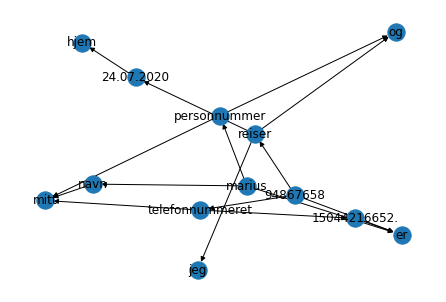

In [8]:
nx.draw(graph, with_labels=True)

In [ ]:
nlp.top_n_nodes(tx, 4)

In [ ]:
sorted(list(graph.degree), key= lambda x: x[1], reverse=True)

In [ ]:
nlp.similarity(tx)

In [ ]:
nlp.predict(tx)

In [ ]:
nlp.add_patterns()

In [ ]:
nlp.replace(tx)

In [ ]:
nlp.predict(tx)

In [ ]:
nlp.display_predictions(tx)